### Introduction

This project focuses on analyzing real-world medical appointment data, and it's part of a startup based in San Francisco, sponsored by HiCounselor. Our main goal is to understand the dataset and uncover important insights from it.
We begin by carefully looking at the medical appointment dataset. We make sure the data is accurate and complete. If we find any mistakes or missing information, we fix it. This step is crucial because clean data helps us make reliable conclusions.
Once our data is clean, we dive into the analysis. We want to understand various aspects like which types of patients visit, what health problems they have, and whether they keep their appointments or not.
Based on what we find in the data, we aim to come up with solutions to common problems. For example, if we notice a pattern of patients missing appointments, we might suggest ways to reduce these no-shows, like reminder systems or better scheduling.

our project is about studying medical appointment data to gain insights that can help improve healthcare services. We analyze patient behavior, health issues, and appointment trends to provide practical solutions for better patient care and management


In [1]:
# importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
ds=pd.read_csv('Hospital_patients_datasets.csv')

In [3]:
# see first 5 rows of the dataset
ds.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [46]:
ds.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSRecevied', 'NoShow',
       'Age_group'],
      dtype='object')

In [4]:
# see last 5 rows of the dataset
ds.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# Shape
ds.shape

(110527, 14)

In this dataset have 110527 rows and 14 columns

In [6]:
ds.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In this dataset have 9 numerical columns and 5 categorical column.

In [8]:
ds["Gender"].unique()

array(['F', 'M'], dtype=object)

In [9]:
# The number of duplicated rows found in the DataFrame.
ds.duplicated().sum()

0

This dataset doesn't contain any duplicate value, means all the values are unique.

In [10]:
# DataFrame with certain column names changed to new names.
ds.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSRecevied','No-show':'NoShow'},inplace=True)

In [11]:
#  DataFrame with 'ScheduledDay' and 'AppointmentDay' columns converted to datetime objects.
ds['ScheduledDay'] =pd.to_datetime(ds['ScheduledDay']).dt.date.astype('datetime64[ns]')
ds['AppointmentDay'] =pd.to_datetime(ds['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [12]:
ds

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,NoShow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSRecevied     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

after some data cleaning process now the dataset contains 9 numerical column and 3 categorical column and 2 datetime column.

In [14]:
# count of null values for each column in the DataFrame
ds.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSRecevied       0
NoShow            0
dtype: int64

This dataset is free of missing values, indicating that there are no null or incomplete data entries within it.

In [13]:
# drop unnecessary columns from the DataFrame
ds.drop(['PatientId', 'AppointmentID','Neighbourhood'],axis=1,inplace=True)

In [15]:
ds

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,NoShow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


#### Convert age column into a new column and named as age group 

In [16]:
#First Drop rows with Age == 0
ds=ds[ds['Age'] !=0]

In [17]:
# Generating labels for age intervals (e.g., '1 - 20', '21 - 40', etc.)
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

In [18]:
# Using the pd.cut() function to categorize ages into groups(use bins = range(1, 130, 20) ,right=False and use the given labels)
ds['Age_group']=pd.cut(ds['Age'],bins=range(1,130,20),labels=labels,right=False)

In [19]:
ds.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,NoShow,Age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,61 - 81
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,41 - 61
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,61 - 81
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1 - 21
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,41 - 61


Now one new column is created age group bassed on patients age, we can see patients comes under which age group.

In [20]:
# convert 'NoShow' values into binary values (1 for 'Yes' and 0 for 'No').
ds['NoShow']=ds['NoShow'].replace(['Yes','No'],[1,0])

In [19]:
# save this cleaned data and give the name patients
ds.to_csv('patients.csv',index=False)

## Import new cleaned dataset 

In [21]:
# write your code to export the cleaned dataset 
df=pd.read_csv("patients (1).csv")

In [22]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,NoShow,Age_group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,0,61 - 81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,0,41 - 61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,61 - 81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,1 - 21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,0,41 - 61


In [25]:
#shape
df.shape

(106988, 11)

After cleaning the data, new dataset contains 106988 rows and 11 columns.

In [23]:
df.describe()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,NoShow
count,106988.00000,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000
mean,0.10103,0.203771,0.074242,0.031405,0.022975,0.323261,0.202640
std,0.30137,0.402802,0.262165,0.174412,0.164114,0.467723,0.401968
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106988 entries, 0 to 106987
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          106988 non-null  object
 1   ScheduledDay    106988 non-null  object
 2   AppointmentDay  106988 non-null  object
 3   Scholarship     106988 non-null  int64 
 4   Hypertension    106988 non-null  int64 
 5   Diabetes        106988 non-null  int64 
 6   Alcoholism      106988 non-null  int64 
 7   Handicap        106988 non-null  int64 
 8   SMSRecevied     106988 non-null  int64 
 9   NoShow          106988 non-null  int64 
 10  Age_group       106987 non-null  object
dtypes: int64(7), object(4)
memory usage: 9.0+ MB


In [26]:
df["SMSRecevied"].unique()

array([0, 1], dtype=int64)

In [27]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSRecevied       0
NoShow            0
Age_group         1
dtype: int64

In [28]:
df[df['Age_group'].isnull()]

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,NoShow,Age_group
96597,F,2016-06-06,2016-06-06,0,0,0,0,0,0,0,NaN


see in this dataset have only one row where Age_group column have null value so we need to drop this row.

In [29]:
# drop that row which have missing values
df.dropna(inplace=True)

In [30]:
# see all the columns in the dataset
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSRecevied',
       'NoShow', 'Age_group'],
      dtype='object')

<Axes: >

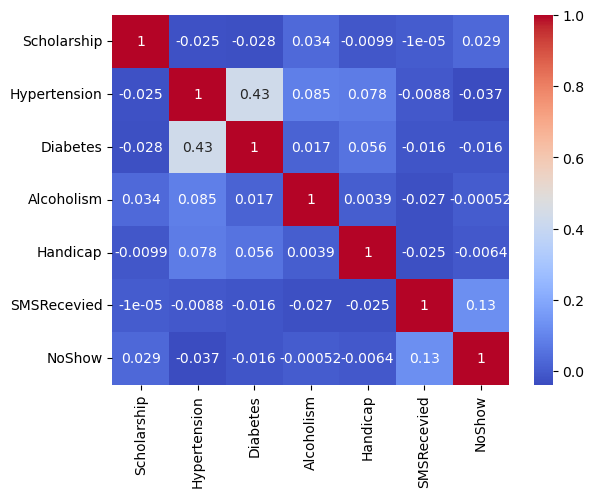

In [31]:
# create a heatmap to see the corelation between each columns
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

There is no column which have a good corelation with other columns.

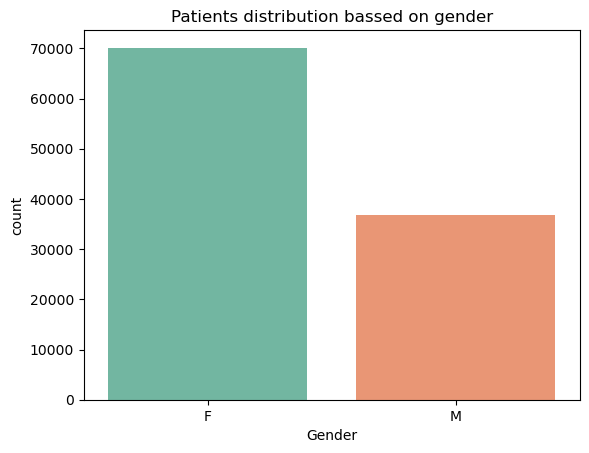

In [35]:
# see the patients gender
sns.countplot(x='Gender',data=df,palette='Set2')
plt.title('Patients distribution bassed on gender')
plt.show()

The majority of patients who visit the hospital are female.

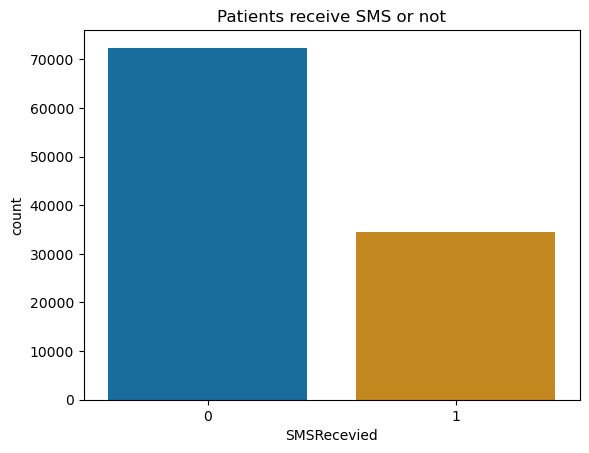

In [34]:
# create a plot to see how many patients received sms.
sns.countplot(x='SMSRecevied',data=df,palette='colorblind')
plt.title('Patients receive SMS or not')
plt.show()

It appears that only a small percentage of patients have received SMS notifications, while a majority of patients have not received any messages. This situation could be attributed to a potential technical issue causing the SMS system to malfunction or, alternatively, it's possible that the clinic has not been sending out the messages as intended. We need to investigate further to identify the root cause of this issue.

### Are SMS reminders effective in reducing no-shows? Should the clinic invest more in this practice?

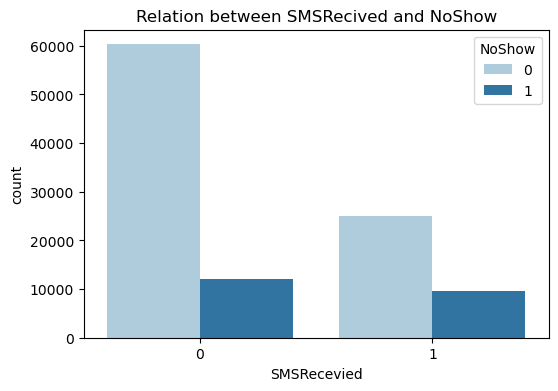

In [33]:
# create a bar plot to see the relation between sms remienders and patients apointment attendance.
plt.figure(figsize=(6, 4)) 
sns.countplot(x='SMSRecevied', hue='NoShow', data=df, palette='Paired')
plt.title('Relation between SMSRecived and NoShow')
plt.show()

see which who's getting sms and which patients don't get sms both the cases patients come to doctor. so not needed to invest more 
on give sms to everyone.

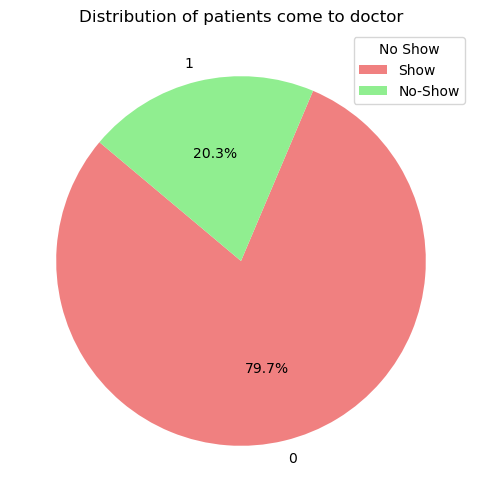

In [32]:
# Calculate the overall no-show rate
no_show_counts= df['NoShow'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(no_show_counts, labels=no_show_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Distribution of patients come to doctor')
plt.legend(title='No Show', labels=['Show', 'No-Show'])
plt.show()

Approximately 80% of patients seek medical attention, while the remaining 20% do not visit a doctor.Here we need to find the reason behind why these 20% patients do not seek medical care, if possible then we need to take nessesary steps to solve these problems and ensure that everyone has access to the healthcare they need.

In [36]:
# Convert columns to datetime objects
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [37]:
# Calculate waiting time
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

<Axes: xlabel='WaitingTime', ylabel='Count'>

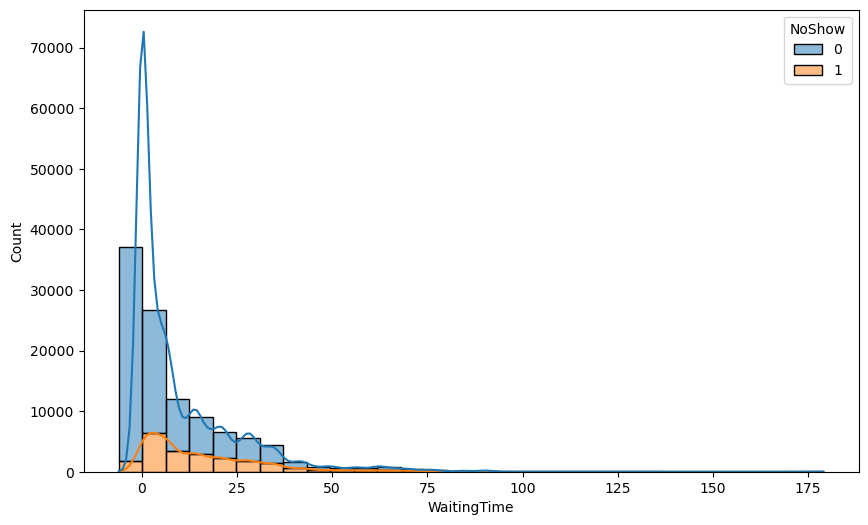

In [38]:
# Create a histogram to visualize waiting times
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df, x='WaitingTime', hue='NoShow', multiple='stack', bins=30, kde=True)

In most situations, patients are typically scheduled for their appointments on the same day or within a few days (1-3 days). However, in some instances, patients may experience longer waiting periods, which can range from 5 days to as much as 25 days before they are able to secure an appointment.

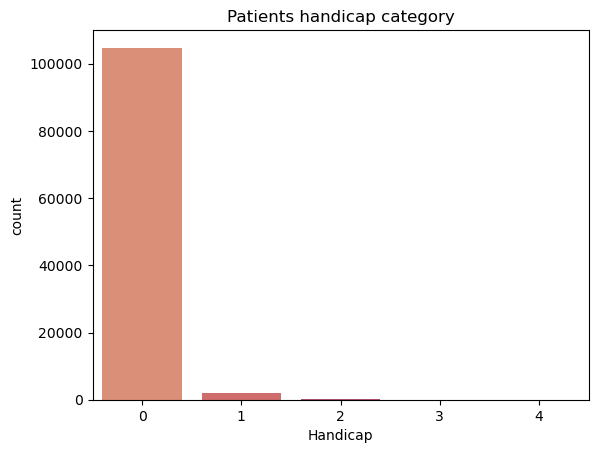

In [50]:
# create a plot to see patients come which category of handicap
sns.countplot(x='Handicap',data=df,palette='flare')
plt.title('Patients handicap category')
plt.show()

The majority of patients do not have any disabilities, but there are some patients who fall into two distinct categories: Category 1 and Category 2, which include individuals with disabilities.

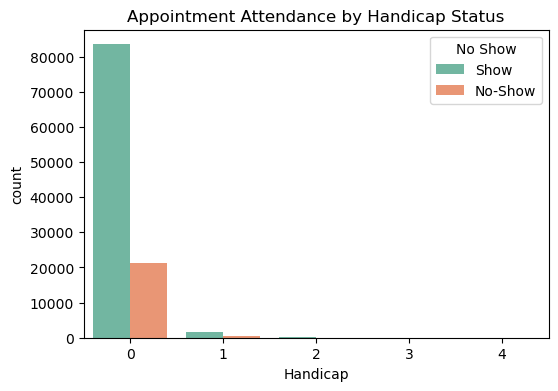

In [42]:
# create a plot to see handicap patients come to doctor 
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Handicap', hue='NoShow', data=df, palette='Set2')
plt.legend(title='No Show', labels=['Show', 'No-Show'])
plt.title('Appointment Attendance by Handicap Status')
plt.show()

Most patients who are not physically handicapped tend to visit their doctors regularly. However, it's important to note that a higher proportion of patients with mild to moderate disabilities, categorized as level 1 and 2, typically seek medical attention at hospitals and consult with doctors.

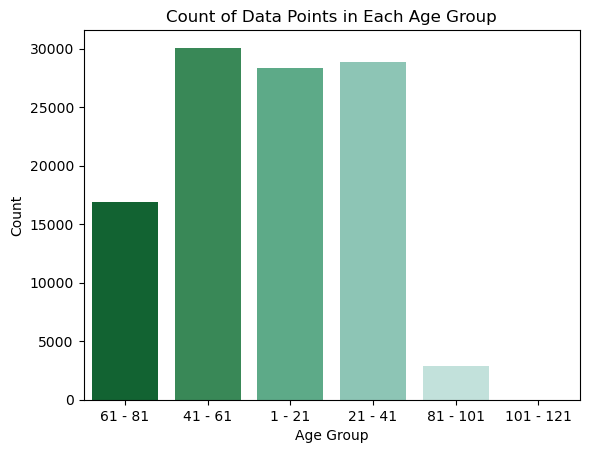

In [44]:
# see the age group distribution which age group patients come to doctor
sns.countplot(x='Age_group',data=df,palette='BuGn_r')
plt.title('Count of Data Points in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

most of the patients come to doctor their age lies between 41 to 61 years and also good number of the patients age between 1 to 41 age group.

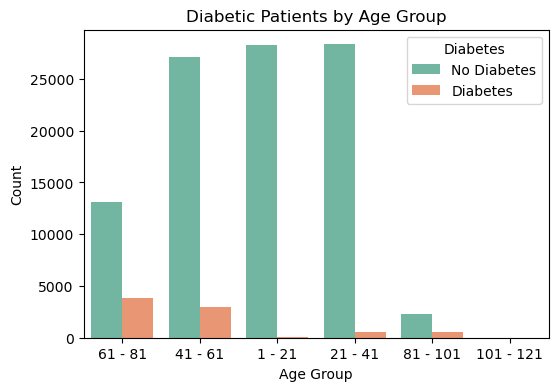

In [45]:
# plot to see diabetic patients bassed on their age group
plt.figure(figsize=(6, 4))  
sns.countplot(x='Age_group', hue='Diabetes', data=df, palette='Set2')
plt.title('Diabetic Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()

Diabetes tends to onset most frequently in individuals between the ages of 21 and 41. However, the prevalence of diabetes significantly increases in the age group ranging from 61 to 81 years old. This means that younger adults are more likely to develop diabetes, but as people reach their senior years, the risk of diabetes becomes substantially higher.

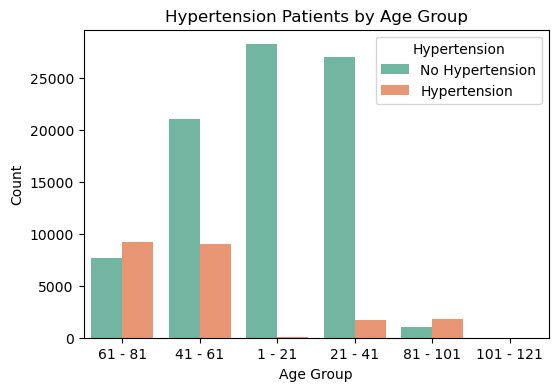

In [41]:
plt.figure(figsize=(6, 4))  
sns.countplot(x='Age_group', hue='Hypertension', data=df, palette='Set2')
plt.title('Hypertension Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Hypertension', labels=['No Hypertension', 'Hypertension'])
plt.show()

People aged 1 to 41 generally do not experience hypertension, a medical condition characterized by high blood pressure. However, as individuals enter the age group of 41 to 100, they are more likely to develop hypertension-related health issues.

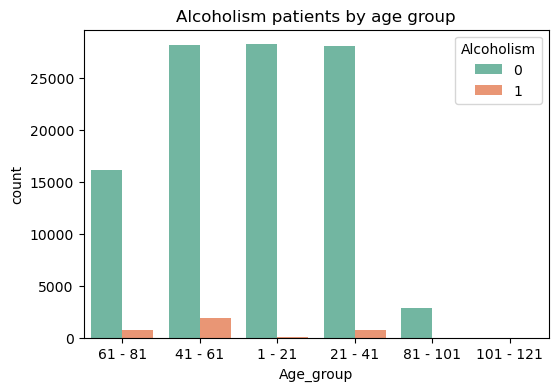

In [40]:
# create a grouped bar plot alcoholism of patients bassed on their age group
plt.figure(figsize=(6, 4))  
sns.countplot(x='Age_group', hue='Alcoholism', data=df, palette='Set2')

plt.title('Alcoholism patients by age group')
plt.show()

We have observed that there is a relatively low number of patients between the ages of 21 and 41 who consume alcohol. However, among patients aged 41 to 61, there is a higher prevalence of alcohol consumption compared to other age groups.

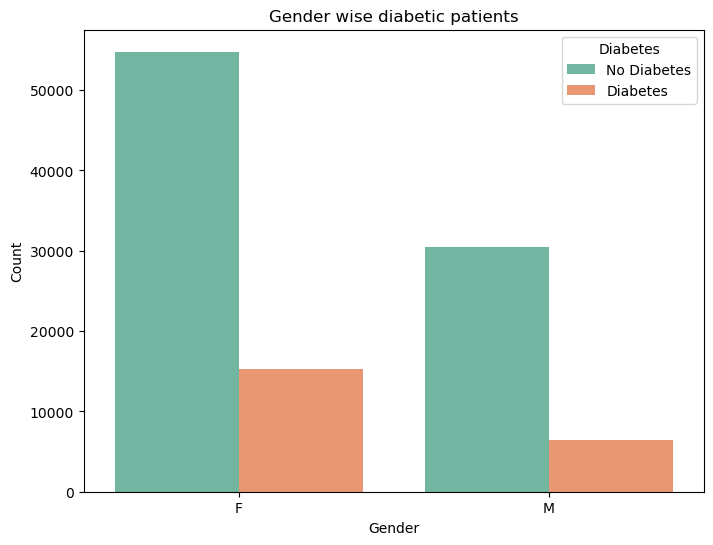

In [39]:
# Plot to see the distribution of diabatic patients gender wise
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Hypertension', palette='Set2')

plt.title('Gender wise diabetic patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()

The majority of patients in the dataset do not have diabetes, with only a small minority having been diagnosed with the condition. Additionally, when we look at the data based on gender, it appears that a greater number of female patients have diabetes compared to their male counterparts.

### Conclution
The Medical Appointment Data Analysis Project has provided valuable insights into patient behavior and healthcare management. Through thorough data analysis, we gained a deeper understanding of patient demographics, health conditions, and appointment attendance patterns.This project showcases the power of data analysis in enhancing patient care and demonstrates our ability to derive actionable solutions from complex healthcare datasets.